In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')
import imblearn
%matplotlib inline

In [2]:
columns = ["duration", "protocol_type","service","flag","src_bytes","dst_bytes", "land", "wrong_fragment","urgent", "hot","num_failed_logins",
          "logged_in", "num_compromised","root_shell","su_attempted", "nun_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds", "is_host login", "is_guest_login", "count", "srv_count", "serror_rate",
          "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate", "srv_diff_host_rate","dst_host_count",
          "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
          "dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate","attack", "last_flag"]

l=len(columns)
print(l)

43


In [3]:
dfkdd_train = pd.read_table("KDDTrain+.txt", sep=",", names=columns)
dfkdd_train = dfkdd_train.iloc[:,:-1]

dfkdd_test = pd.read_table("KDDTest+.txt", sep=",", names=columns)
dfkdd_test = dfkdd_test.iloc[:,:-1]


In [4]:
dfkdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
print('Train set dimensions: {} rows, {} columns'.format(dfkdd_train.shape[0],dfkdd_train.shape[1]))

Train set dimensions: 125973 rows, 42 columns


In [6]:
print('Test set dimensions: {} rows, {} columns'.format(dfkdd_test.shape[0],dfkdd_test.shape[1]))

Test set dimensions: 22544 rows, 42 columns


In [7]:
mapping = {'ipsweep': 'Probe', 'satan': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'saint': 'Probe', 'mscan': 'Probe',
           'teardrop': 'DoS', 'pod': 'DoS', 'land': 'DoS', 'back': 'DoS', 'neptune': 'DoS', 'smurf': 'DoS', 'mailbomb': 'DoS',
           'udpstorm': 'DoS', 'apache2': 'DoS', 'processtable': 'DoS',
           'perl': 'U2R', 'loadmodule': 'U2R', 'rootkit': 'U2R', 'buffer_overflow': 'U2R', 'xterm' : 'U2R', 'ps': 'U2R',
           'sqlattack': 'U2R', 'httptunnel': 'U2R',
           'ftp_write': 'R2L', 'phf': 'R2L', 'guess_passwd': 'R2L', 'warezmaster': 'R2L', 'warezclient': 'R2L', 'imap': 'R2L',
           'spy': 'R2L', 'multihop': 'R2L', 'named': 'R2L', 'snmpguess': 'R2L', 'worm': 'R2L', 'snmpgetattack': 'R2L',
           'xsnoop': 'R2L', 'xlock': 'R2L', 'sendmail': 'R2L', 'normal': 'Normal'}

print(len(mapping))

40


In [8]:
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda x: mapping[x])
dfkdd_test['attack_class'] = dfkdd_test['attack'].apply(lambda x: mapping[x])

In [9]:
dfkdd_train.drop(['attack'], axis=1, inplace = True)
dfkdd_test.drop(['attack'], axis=1, inplace = True)

In [10]:
dfkdd_train['attack_class'].value_counts()

Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: attack_class, dtype: int64

[67343, 45927, 11656, 995]


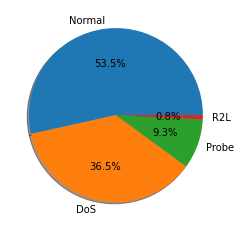

In [11]:
from collections import Counter


diff_attack_class = []
attack_class_values = []

# c=Counter(dfkdd_train['attack_class'])
for item in Counter(dfkdd_train['attack_class']).most_common(4):
    diff_attack_class.append(item[0])
    attack_class_values.append(item[1])

    
print(attack_class_values)
plt.pie(
    attack_class_values,
    labels=diff_attack_class,
    shadow =True,
    autopct='%1.1f%%'
)
plt.show()

In [12]:
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dfkdd_train["attack_class"]

0         Normal
1         Normal
2            DoS
3         Normal
4         Normal
           ...  
125968       DoS
125969    Normal
125970    Normal
125971       DoS
125972    Normal
Name: attack_class, Length: 125973, dtype: object

In [14]:
dfkdd_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())

attack_class_freq_train['freq_percent_train'] = round((100*attack_class_freq_train/attack_class_freq_train.sum()),2)
attack_class_freq_test['freq_percent_test'] = round((100*attack_class_freq_test/attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test],axis=1)
attack_class_dist

,attack_class,freq_percent_train,attack_class,freq_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


In [ ]:
#TO DO 

change names in the above table

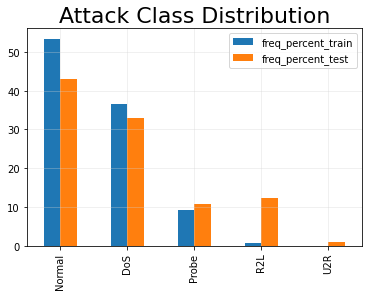

<Figure size 1440x1440 with 0 Axes>

In [16]:
plot = attack_class_dist[['freq_percent_train','freq_percent_test']].plot(kind="bar")
plt.figure(figsize=(20,20))
plot.set_title("Attack Class Distribution",fontsize=22)
plot.grid(color="lightgray",alpha=0.4)
plot.legend()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train,columns = cols)
sc_testdf = pd.DataFrame(sc_test,columns = cols)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

enctrain = traincat.drop(['attack_class'],axis=1)
enctest = testcat.drop(['attack_class'],axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [19]:
sc_train

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.6248708 ,
        -0.22453241, -0.37638703],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.6248708 ,
        -0.35501418, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703]])

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

sc_traindf = dfkdd_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf,enctrain], axis=1).columns
refclass = np.concatenate((sc_train,enctrain.values),axis=1)
X = refclass

c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X,y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


In [56]:
len(X_res)

336715

In [21]:
print(len(X_res[0]))

41


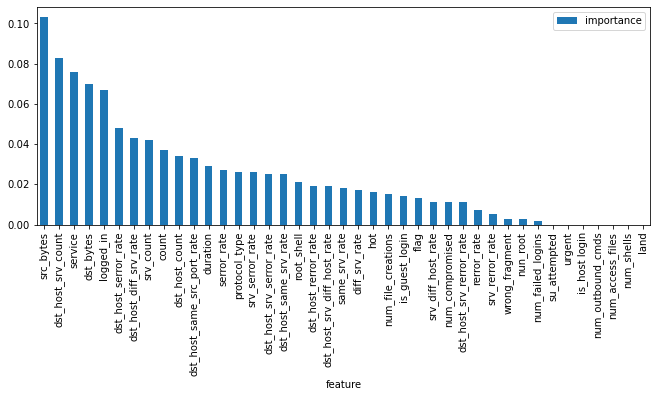

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_res,y_res)

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11,4)
importances.plot.bar();

In [21]:
print(X_res[0])

[-1.10249223e-01 -7.67859947e-03 -4.91864438e-03 -1.40888118e-02
 -8.94864220e-02 -7.73598503e-03 -9.50756715e-02 -2.70228184e-02
 -8.09261819e-01 -1.16636426e-02 -3.66518691e-02 -2.44365073e-02
 -1.23851504e-02 -2.61800242e-02 -1.86098963e-02 -4.12211976e-02
  0.00000000e+00 -2.81749392e-03 -9.75309440e-02 -7.17045492e-01
 -3.54342850e-01 -6.37209268e-01 -6.31929033e-01 -3.74362240e-01
 -3.74431603e-01  7.71283106e-01 -3.49683031e-01 -3.74559704e-01
 -3.24063093e-01 -8.18889977e-01 -7.82366826e-01 -2.80281676e-01
  6.99722578e-02 -2.89103400e-01 -6.39531905e-01 -6.24870800e-01
 -2.24532415e-01 -3.76387026e-01  1.00000000e+00  2.00000000e+01
  9.00000000e+00]


In [22]:
rfc.predict([X_res[69]])

array([0])

In [23]:
import pickle 

with open('model_pickle','wb') as f:
    pickle.dump(rfc,f)




In [24]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)



In [87]:
len(X_res)

336715

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import itertools
rfc = RandomForestClassifier()

rfe=RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train1,y_train1)

feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(),refclasscol)]
selected_feature = [v for i, v in feature_map if i==True]

In [89]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

In [90]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import itertools
rfc = RandomForestClassifier()

rfe=RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train1,y_train1)

feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(),refclasscol)]
selected_feature = [v for i, v in feature_map if i==True]

In [91]:
pred_rfe=rfe.predict(X_test1)
acc2 = metrics.accuracy_score(y_test1, pred_rfe)
acc2

In [93]:
acc2 = metrics.accuracy_score(y_test1, pred_rfe)
acc2

0.9997178622870974

In [23]:
selected_features = selected_feature
print(selected_features)

['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'service']


In [24]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape
reftest.shape

(22544, 42)

In [25]:
res_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1.0,20.0,9.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2.0,44.0,9.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1.0,24.0,9.0,1.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,24.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-0.110249,-0.007762,-0.003517,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,0.071872,...,2.756092,0.599285,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,4.0
336711,-0.042674,-0.007497,-0.004239,-0.014089,-0.089486,-0.007736,1.300299,-0.027023,1.235694,0.155407,...,-0.091842,-0.289103,-0.639532,-0.624871,0.003811,-0.000751,1.0,60.0,9.0,4.0
336712,-0.110249,-0.007762,-0.003469,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,2.756092,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,4.0
336713,-0.110249,-0.007762,-0.004403,-0.014089,-0.089486,-0.007736,0.370049,-0.027023,1.235694,-0.011664,...,2.756092,-0.111426,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,4.0


In [26]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [27]:
classdict

defaultdict(list,
            {'Normal_DoS': [        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
              0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
              1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
              2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
              3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
              4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
              ...          ...        ...        ...       ...             ...       ...   
              147384 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
              147385 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
              147386 -0.110249  -0.007586  -0.004919 -0.014089       -0.089486 -0.007736   
              147387 -0.110249  -0.007762  -0.00

In [28]:
for k, v in classdict.items():
    k

In [29]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

In [30]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [66]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
#RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train);

KeyboardInterrupt: 

In [67]:
from sklearn.ensemble import VotingClassifier
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train);

In [60]:
RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train); 

In [68]:
from sklearn.ensemble import VotingClassifier
combined_model1 = [('Naive Baye Classifier', BNB_Classifier), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('KNeighborsClassifier', KNN_Classifier), 
                  ('LogisticRegression', LGR_Classifier),
                  ('RF_Classifier',RF_Classifier)
                 ]
VotingClassifier1 =  VotingClassifier(estimators = combined_model1,voting = 'soft', n_jobs=-1)
VotingClassifier1.fit(X_train, Y_train)

In [78]:
VotingClassifier3 =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier3.fit(X_test, Y_test)

In [32]:
pre=VotingClassifier.predict_proba([X_test[69]])
pre

print([0.00296253+0.99703747])

[1.0]


In [43]:
Y_test[0]

0.0

In [39]:
#x_test without rfe classifier
pred1

array([[0.9957245 , 0.0042755 ],
       [0.99462718, 0.00537282],
       [0.10558922, 0.89441078],
       ...,
       [0.00280823, 0.99719177],
       [0.00217518, 0.99782482],
       [0.06815106, 0.93184894]])

In [83]:
pred3=VotingClassifier3.predict_proba(X_test[:8000])

In [82]:
len(X_test)

17169

In [44]:
res=[]
for i in range(len(pred1)):
    if(pred1[i][0]>0.5):
        res.append(0.0)
    else:
        res.append(1.0)

In [84]:
pred3=VotingClassifier3.predict_proba(X_test)
res1=[]
for i in range(len(pred3)):
    if(pred3[i][0]>0.5):
        res1.append(0.0)
    else:
        res1.append(1.0)
acc2 = metrics.accuracy_score(Y_test, res1)
acc2

0.996875

In [45]:
res

[0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0

In [47]:
from sklearn import metrics
acc1 = metrics.accuracy_score(Y_test, res)

In [48]:
acc1

0.8417496650940649

In [94]:
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
#models.append(('VotingClassifier', VotingClassifier))

score_scores = []
score_accuracy = []
score_confusion_matrix = []


for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    score_scores.append(scores.mean())
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    score_accuracy.append(accuracy)
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    score_confusion_matrix.append(confusion_matrix)
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

AttributeError: 'SVC' object has no attribute 'shape_fit_'

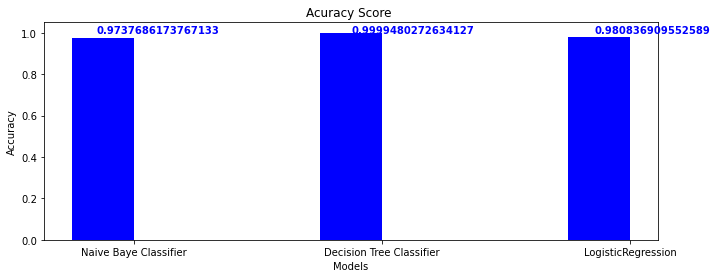

3


In [35]:
model_names = []
for i, _ in models:
    model_names.append(i)

# print(model_names)

# plt.bar(model_names,score_accuracy)
# plt.show()

fig, ax = plt.subplots()    
width = 0.25 # the width of the bars 
ind = np.arange(len(model_names))  # the x locations for the groups
ax.bar(ind, score_accuracy, width, color="blue")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(model_names, minor=False)
plt.title('Acuracy Score ')
plt.xlabel('Models')
plt.ylabel('Accuracy')      

indent=-1
for i, v in enumerate(score_accuracy):
    ax.text(v+ indent, i-indent, str(v), color='blue', fontweight='bold')
    indent+=1
plt.show()

print(len(score_scores))


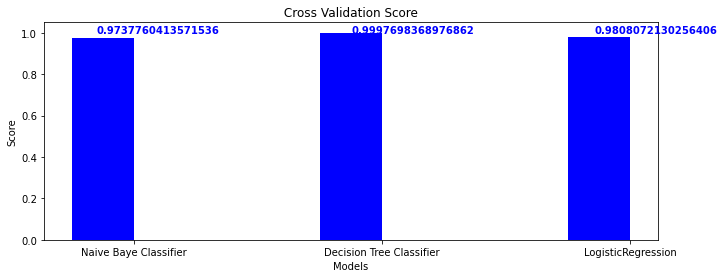

In [36]:
fig, ax = plt.subplots()    
width = 0.25 # the width of the bars 
ind = np.arange(len(model_names))  # the x locations for the groups
ax.bar(ind, score_scores, width, color="blue")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(model_names, minor=False)
plt.title(' Cross Validation Score ')
plt.xlabel('Models')
plt.ylabel('Score')      

indent=-1
for i, v in enumerate(score_scores):
    ax.text(v+ indent, i-indent, str(v), color='blue', fontweight='bold')
    indent+=1
plt.show()

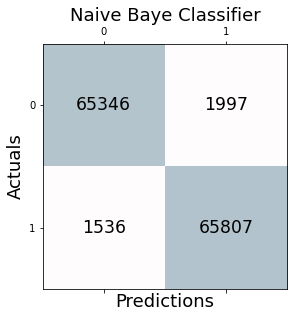

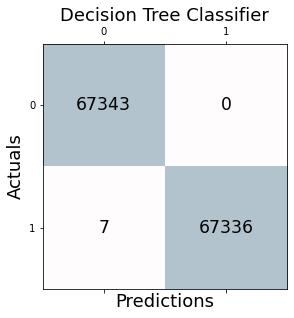

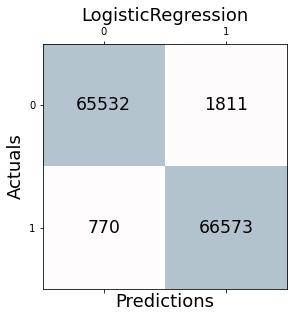

In [37]:
c=0
for i in score_confusion_matrix:
    conf_matrix=i
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(conf_matrix, cmap=plt.cm.PuBu, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(model_names[c], fontsize=18)
    c+=1
    plt.show()

In [86]:
models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
#models.append(('VotingClassifier', VotingClassifier))

score_scores = []
score_accuracy = []
score_confusion_matrix = []
score_scores=[]
score_accuracy = []
score_confusion_matrix = []

for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    score_accuracy.append(accuracy)
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    score_confusion_matrix.append(confusion_matrix)
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

AttributeError: 'SVC' object has no attribute 'shape_fit_'

In [39]:
print(score_accuracy)
print(len(score_confusion_matrix))

[0.8336536781408352, 0.8165880365775525, 0.8418661541149747]
3


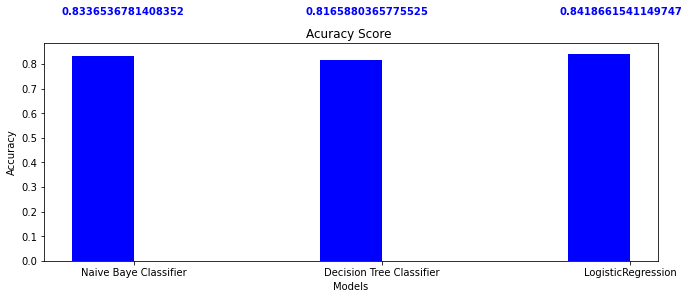

In [40]:
model_names = []
for i, _ in models:
    model_names.append(i)

# print(model_names)

# plt.bar(model_names,score_accuracy)
# plt.show()

fig, ax = plt.subplots()    
width = 0.25 # the width of the bars 
ind = np.arange(len(model_names))  # the x locations for the groups
ax.bar(ind, score_accuracy, width, color="blue")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(model_names, minor=False)
plt.title('Acuracy Score ')
plt.xlabel('Models')
plt.ylabel('Accuracy')      

indent=-1
for i, v in enumerate(score_accuracy):
    ax.text(v+ indent, i-indent, str(v), color='blue', fontweight='bold')
    indent+=1
plt.show()



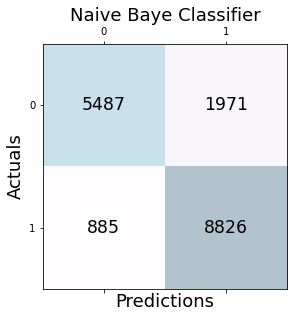

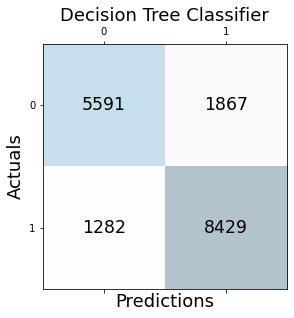

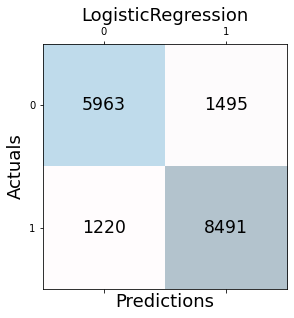

In [41]:
c=0
for i in score_confusion_matrix:
    conf_matrix=i
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(conf_matrix, cmap=plt.cm.PuBu, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(model_names[c], fontsize=18)
    c+=1
    plt.show()